# Data Preprocessing and Exploration for Finance Analysis

1. import neccessary packages

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
sys.path.insert(0,'../src/')
from data_processing import download_historical_data, standardize_data_types,decompose_time_series_all_in_one, separate_data,check_basic_statistics, check_missing_values, display_cleaned_data, ensure_data_types, handle_missing_values, normalize_data,plot_closing_prices,calculate_daily_returns,analyze_volatility,detect_outliers,visualize_All_in_one,analyze_unusual_returns,save_ticker_data



In [3]:
# Define the tickers and the time period
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2020-01-01'
end_date = '2023-12-31'

# Download the historical data
historical_data = download_historical_data(tickers, start_date, end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


In [4]:
# Separate the data for each ticker
data_frames = separate_data(historical_data, tickers)

# Display the first few rows of each dataframe
for ticker, data in data_frames.items():
    print(f"Data for {ticker}:")
    print(data.head(), "\n")

Data for TSLA:
        Date      Close       Open       High        Low     Volume
0 2020-01-02  28.684000  28.299999  28.713333  28.114000  142981500
1 2020-01-03  29.534000  29.366667  30.266666  29.128000  266677500
2 2020-01-06  30.102667  29.364668  30.104000  29.333332  151995000
3 2020-01-07  31.270666  30.760000  31.441999  30.224001  268231500
4 2020-01-08  32.809334  31.580000  33.232666  31.215334  467164500 

Data for BND:
        Date      Close       Open       High        Low   Volume
0 2020-01-02  72.731873  72.740536  72.853135  72.697225  5511000
1 2020-01-03  72.991714  72.913763  73.009041  72.844468  5368300
2 2020-01-06  72.905098  73.017704  73.026361  72.853130  3710400
3 2020-01-07  72.844467  72.931082  72.931082  72.818483  3029900
4 2020-01-08  72.731873  72.870456  72.931087  72.671241  3674400 

Data for SPY:
        Date       Close        Open        High         Low    Volume
0 2020-01-02  301.194885  299.961822  301.213446  299.025418  59151200
1 2020-

In [5]:
for ticker, data in data_frames.items():
    print(f"Min-Val for {ticker} is {data["Close"].min()} \n Max-Val for {ticker} is {data["Close"].max()}\n")
    

Min-Val for TSLA is 24.08133316040039 
 Max-Val for TSLA is 409.9700012207031

Min-Val for BND is 63.98542404174805 
 Max-Val for BND is 78.58892822265625

Min-Val for SPY is 207.91786193847656 
 Max-Val for SPY is 470.6528015136719



In [6]:
# Check basic statistics

check_basic_statistics(data_frames)



Basic Statistics for TSLA:
                                Date        Close         Open         High  \
count                           1006  1006.000000  1006.000000  1006.000000   
mean   2021-12-30 11:57:08.230616320   209.126371   209.199484   213.949515   
min              2020-01-02 00:00:00    24.081333    24.980000    26.990667   
25%              2020-12-30 06:00:00   160.210003   159.702499   161.952496   
50%              2021-12-29 12:00:00   223.489998   223.954994   229.125000   
75%              2022-12-28 18:00:00   262.967491   263.557503   268.260010   
max              2023-12-29 00:00:00   409.970001   411.470001   414.496674   
std                              NaN    85.797682    85.988785    87.686367   

               Low        Volume  
count  1006.000000  1.006000e+03  
mean    204.067199  1.332191e+08  
min      23.367332  2.940180e+07  
25%     153.649998  7.707188e+07  
50%     218.174995  1.071037e+08  
75%     258.307510  1.577770e+08  
max     405.6666

In [7]:
# Standardize data types
data_frames = standardize_data_types(data_frames)

# Check data types after standardization
for ticker, data in data_frames.items():
    print(f"Data Types for {ticker} after standardization:")
    print(data.dtypes, "\n")

Data Types for TSLA after standardization:
Date      datetime64[ns]
Close            float64
Open             float64
High             float64
Low              float64
Volume           float64
dtype: object 

Data Types for BND after standardization:
Date      datetime64[ns]
Close            float64
Open             float64
High             float64
Low              float64
Volume           float64
dtype: object 

Data Types for SPY after standardization:
Date      datetime64[ns]
Close            float64
Open             float64
High             float64
Low              float64
Volume           float64
dtype: object 



In [8]:
# Ensure appropriate data types
ensure_data_types(data_frames)



Data Types for TSLA:
Date      datetime64[ns]
Close            float64
Open             float64
High             float64
Low              float64
Volume           float64
dtype: object 

Data Types for BND:
Date      datetime64[ns]
Close            float64
Open             float64
High             float64
Low              float64
Volume           float64
dtype: object 

Data Types for SPY:
Date      datetime64[ns]
Close            float64
Open             float64
High             float64
Low              float64
Volume           float64
dtype: object 



In [9]:
# Check for missing values
check_missing_values(data_frames)



Missing Values for TSLA:
Date      0
Close     0
Open      0
High      0
Low       0
Volume    0
dtype: int64 

Missing Values for BND:
Date      0
Close     0
Open      0
High      0
Low       0
Volume    0
dtype: int64 

Missing Values for SPY:
Date      0
Close     0
Open      0
High      0
Low       0
Volume    0
dtype: int64 



In [10]:
# Handle missing values (example: forward fill)
data_frames = handle_missing_values(data_frames, method='ffill')



e:\Development\10-Accademy\Investment-portfolio-forecasting\notebooks\../src\data_processing.py:111: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_frames[ticker] = data.fillna(method=method)


In [11]:
# Normalize or scale the data
data_frames = normalize_data(data_frames)



In [12]:
# Display the cleaned and scaled data
display_cleaned_data(data_frames)

Cleaned and Scaled Data for TSLA:
        Date     Close      Open      High       Low    Volume
0 2020-01-02  0.011927  0.008590  0.004446  0.012416  0.128385
1 2020-01-03  0.014130  0.011350  0.008454  0.015068  0.268205
2 2020-01-06  0.015604  0.011345  0.008034  0.015606  0.138573
3 2020-01-07  0.018631  0.014955  0.011487  0.017935  0.269962
4 2020-01-08  0.022618  0.017077  0.016108  0.020528  0.494826 

Cleaned and Scaled Data for BND:
        Date     Close      Open      High       Low    Volume
0 2020-01-02  0.598928  0.603000  0.598200  0.605241  0.154749
1 2020-01-03  0.616721  0.614637  0.608941  0.615166  0.148493
2 2020-01-06  0.610790  0.621619  0.610134  0.615750  0.075816
3 2020-01-07  0.606638  0.615800  0.603570  0.613415  0.045985
4 2020-01-08  0.598928  0.611728  0.603570  0.603490  0.074238 

Cleaned and Scaled Data for SPY:
        Date     Close      Open      High       Low    Volume
0 2020-01-02  0.355023  0.337772  0.338192  0.358032  0.089384
1 2020-01-03  

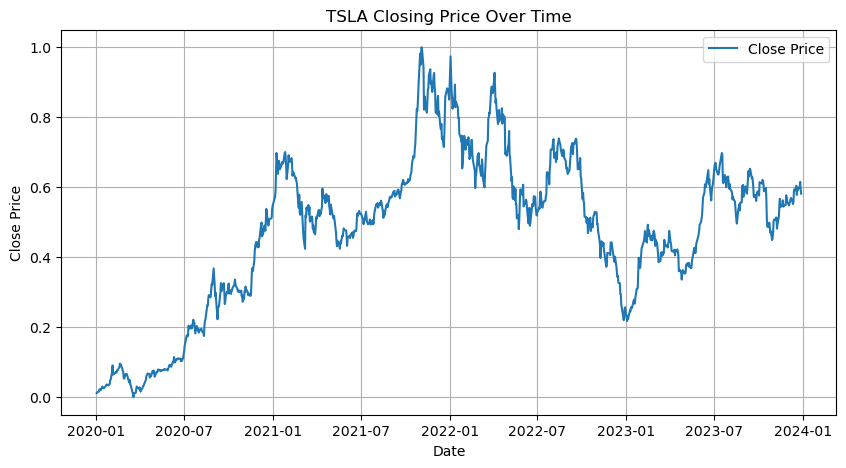

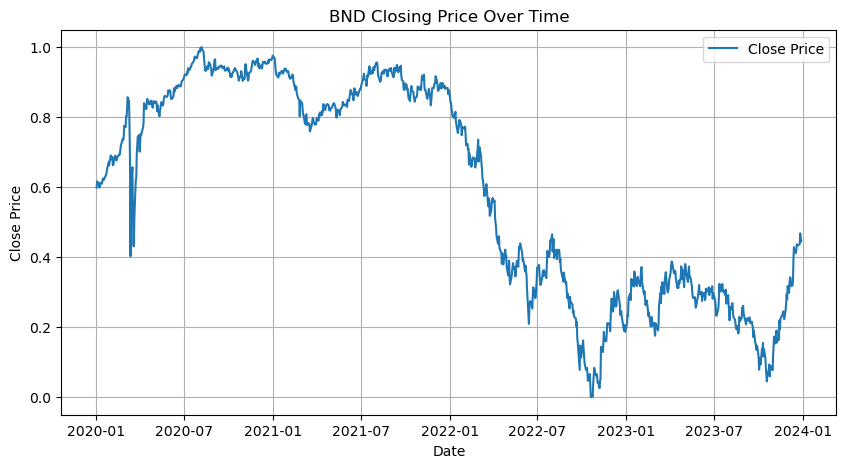

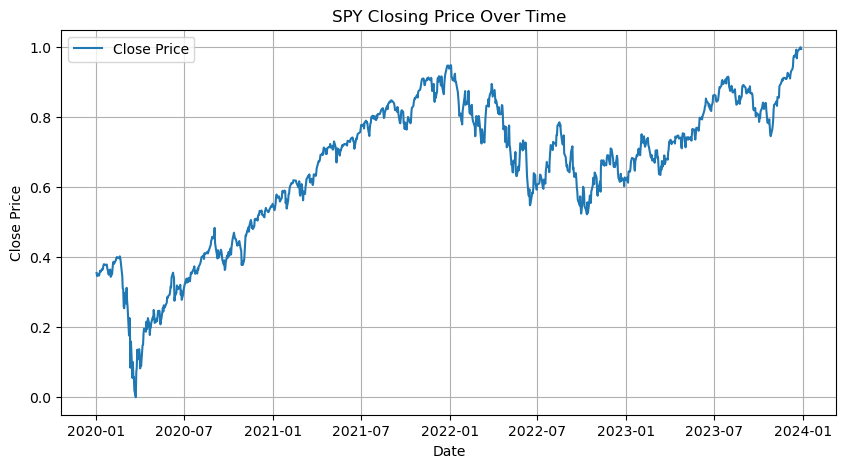

In [13]:
# Visualize closing prices
plot_closing_prices(data_frames)



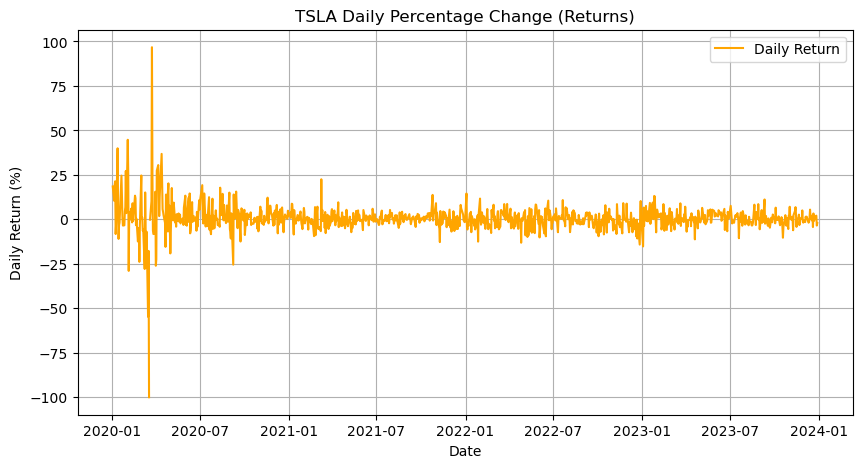

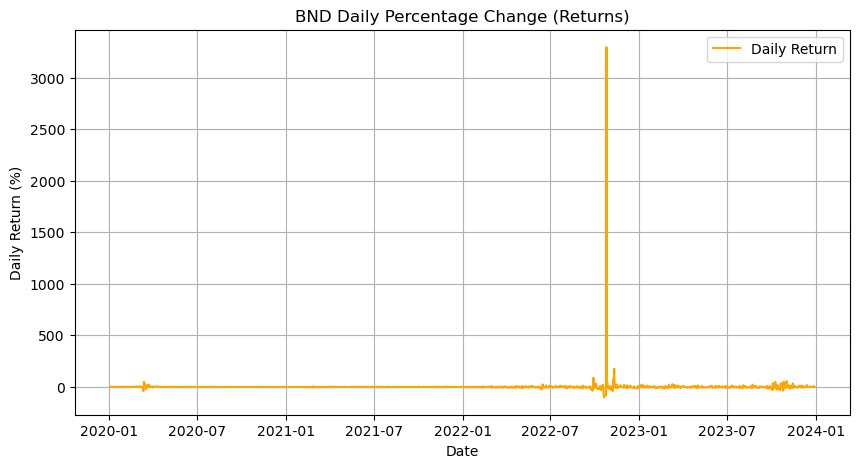

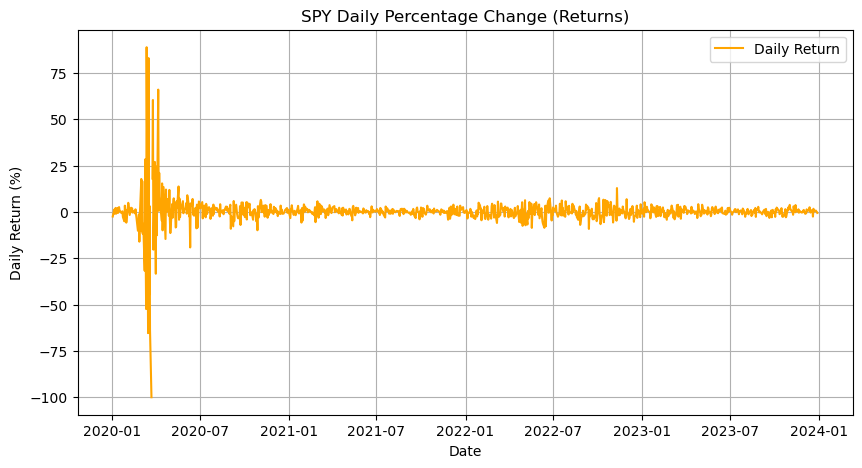

In [14]:
# Calculate and plot daily returns
calculate_daily_returns(data_frames)



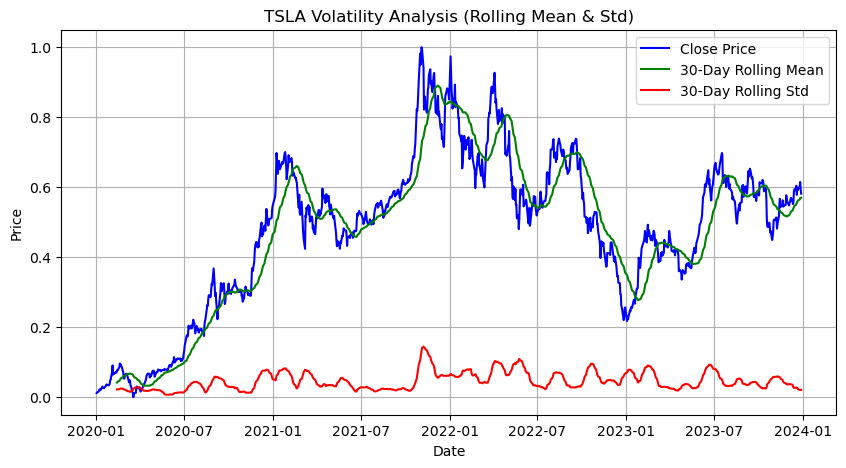

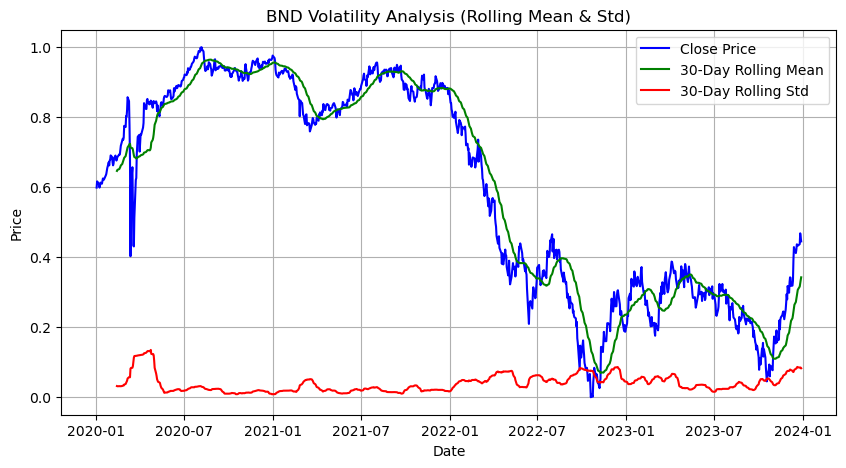

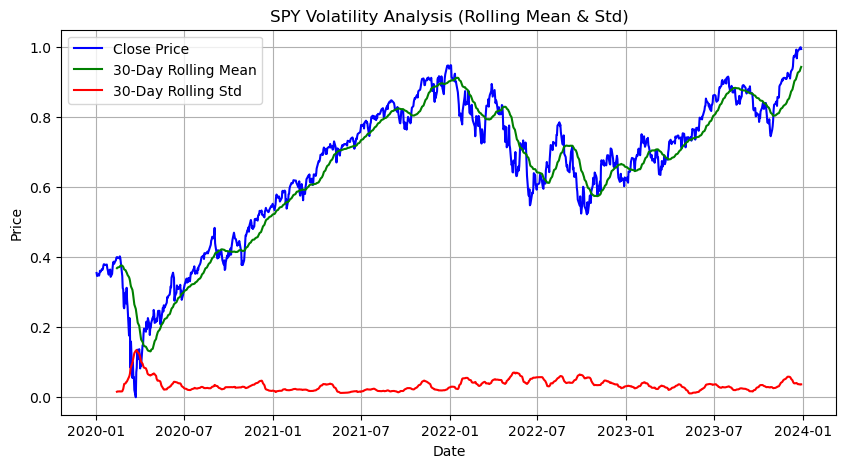

In [15]:
# Analyze volatility with rolling means and standard deviations
analyze_volatility(data_frames, window=30)



In [16]:
# Detect outliers using Z-score
detect_outliers(data_frames, threshold=3)



Outliers for TSLA:
Empty DataFrame
Columns: [Date, Close, Z-Score]
Index: [] 

Outliers for BND:
Empty DataFrame
Columns: [Date, Close, Z-Score]
Index: [] 

Outliers for SPY:
         Date     Close   Z-Score
54 2020-03-20  0.020765 -3.066674
55 2020-03-23  0.000000 -3.167594 



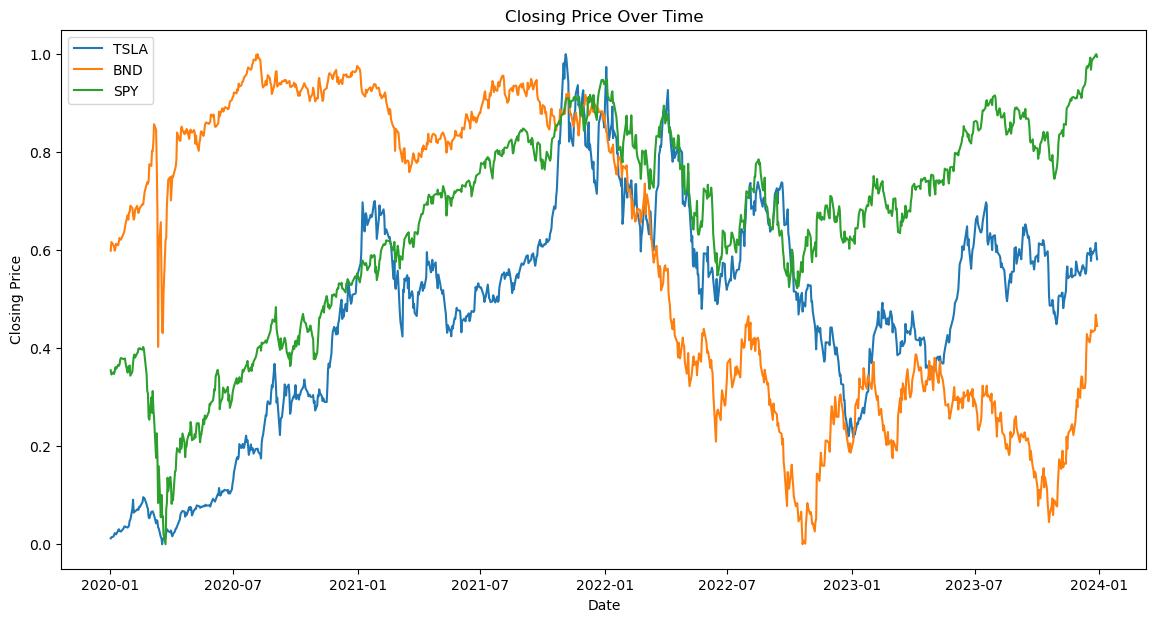

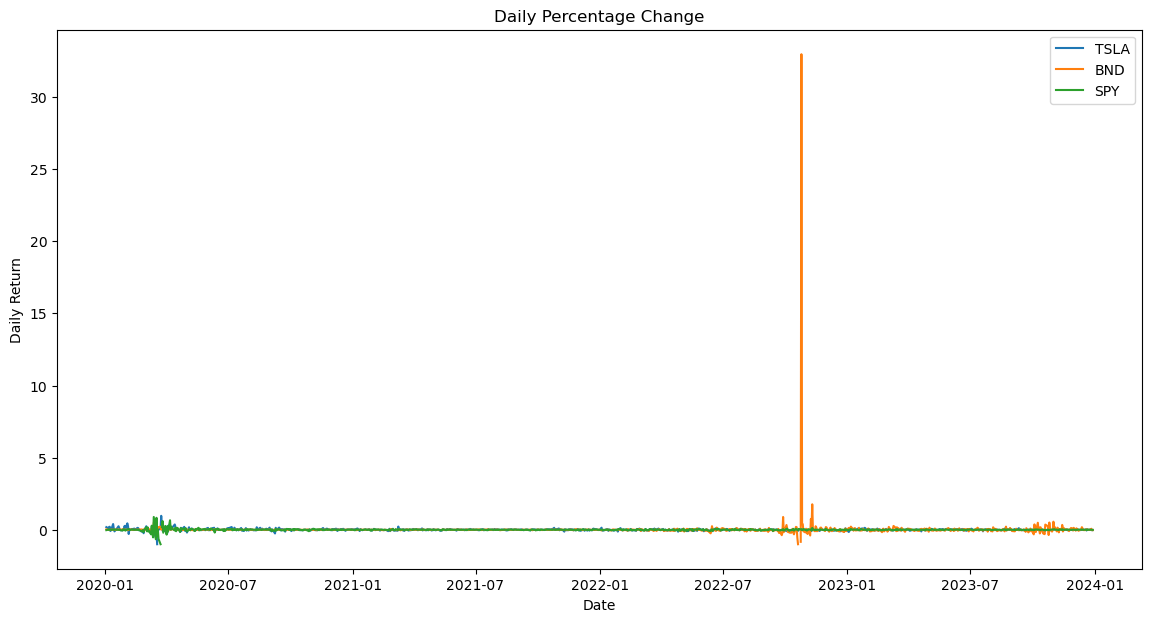

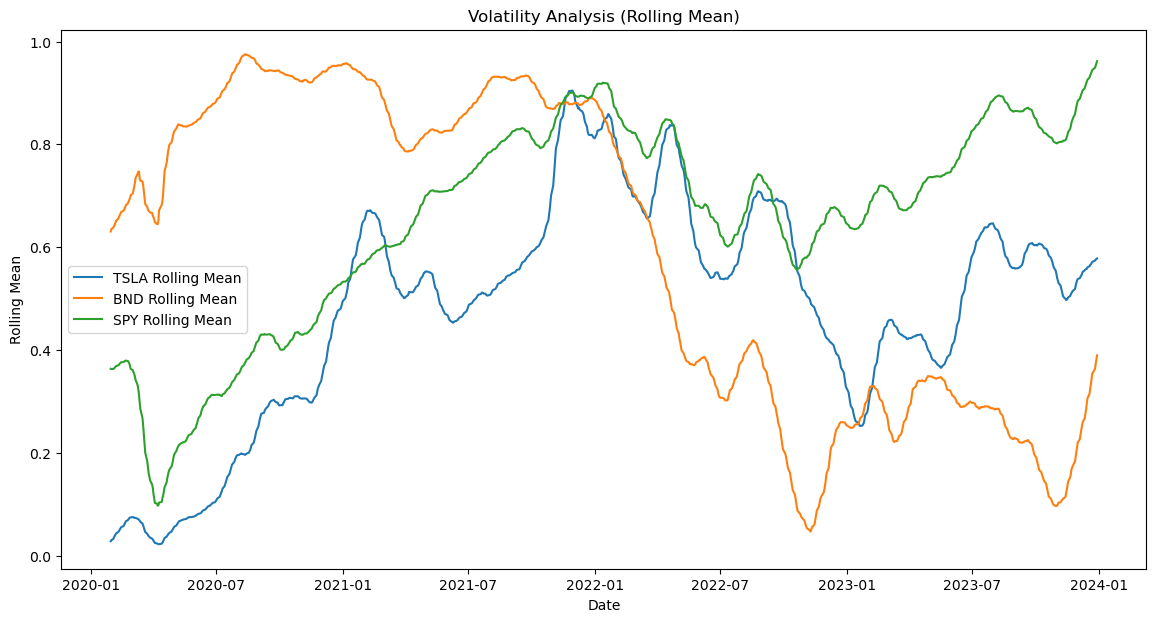

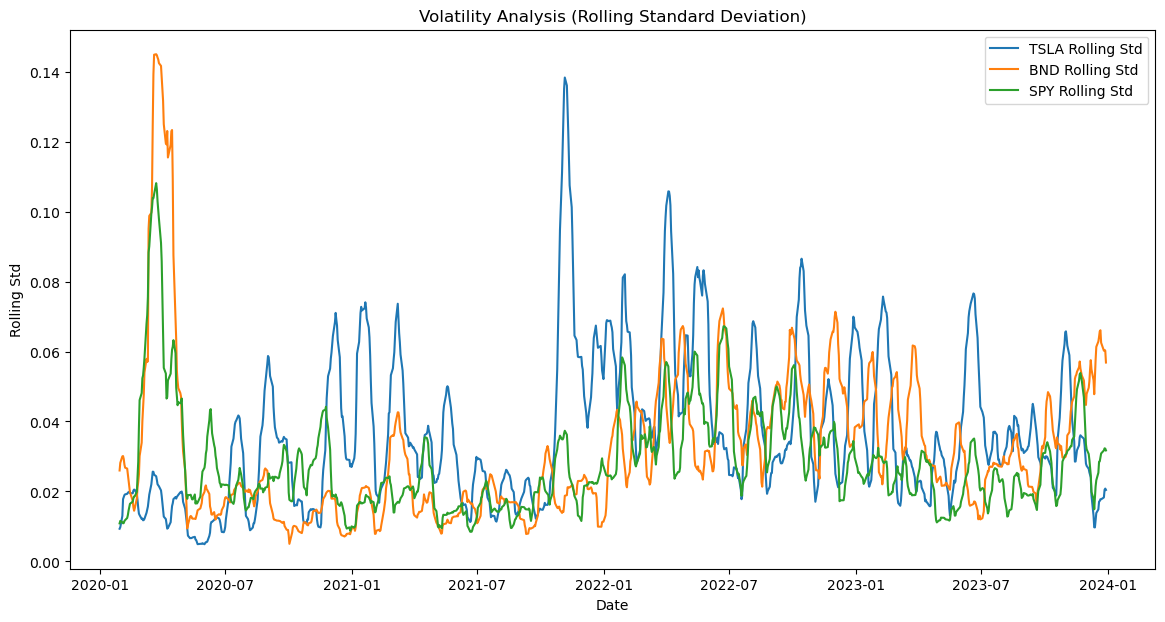

In [17]:
visualize_All_in_one(data_frames)

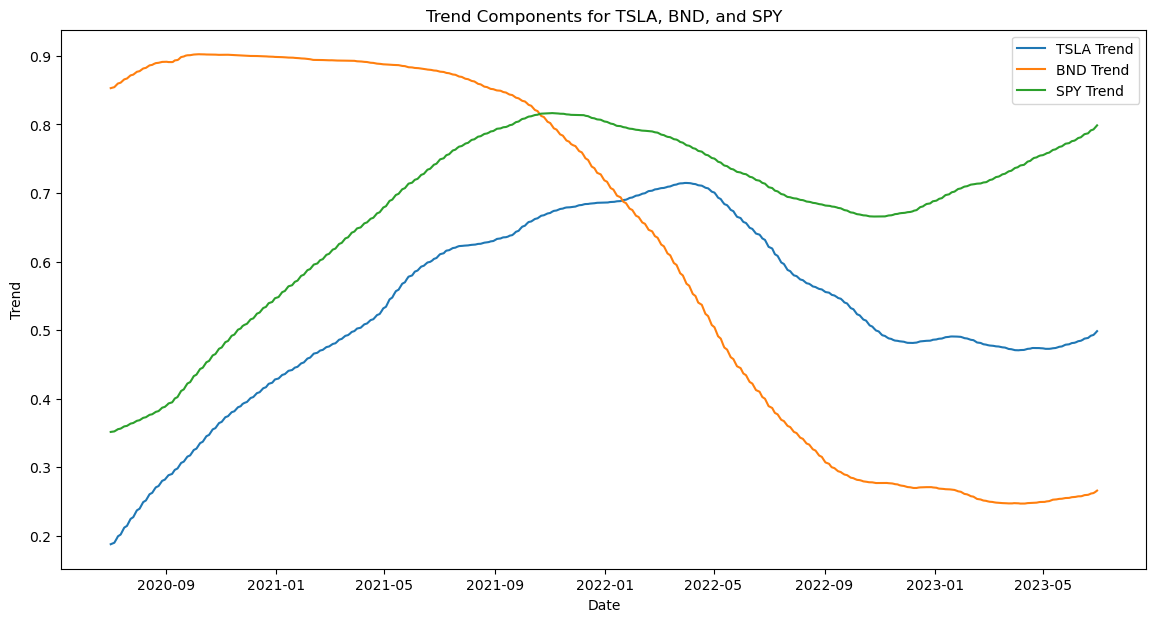

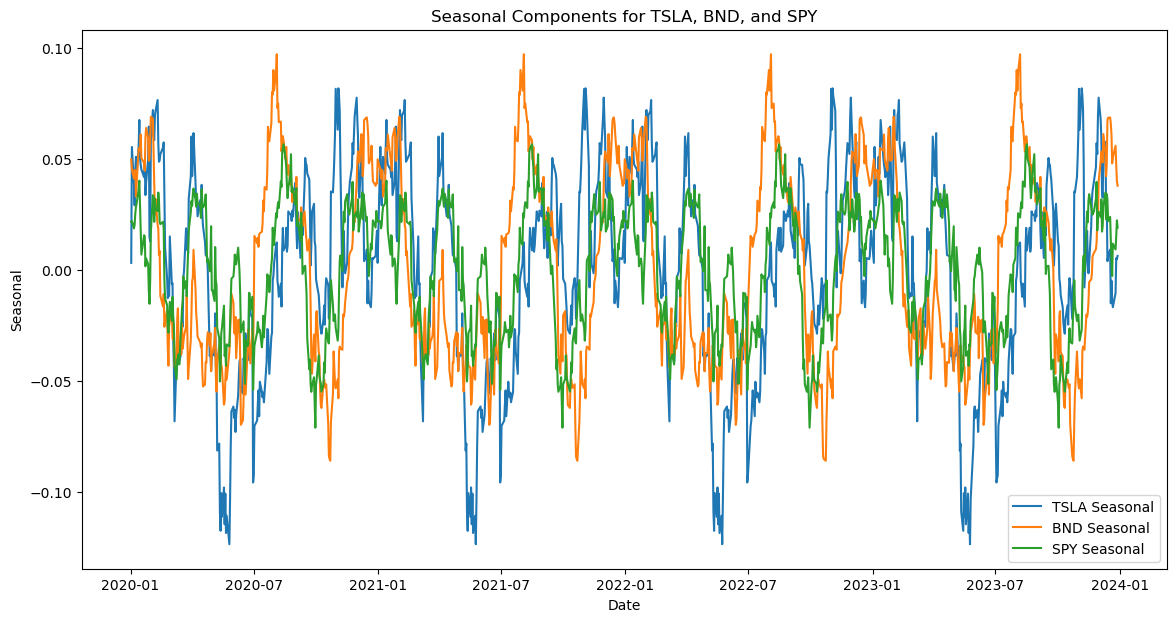

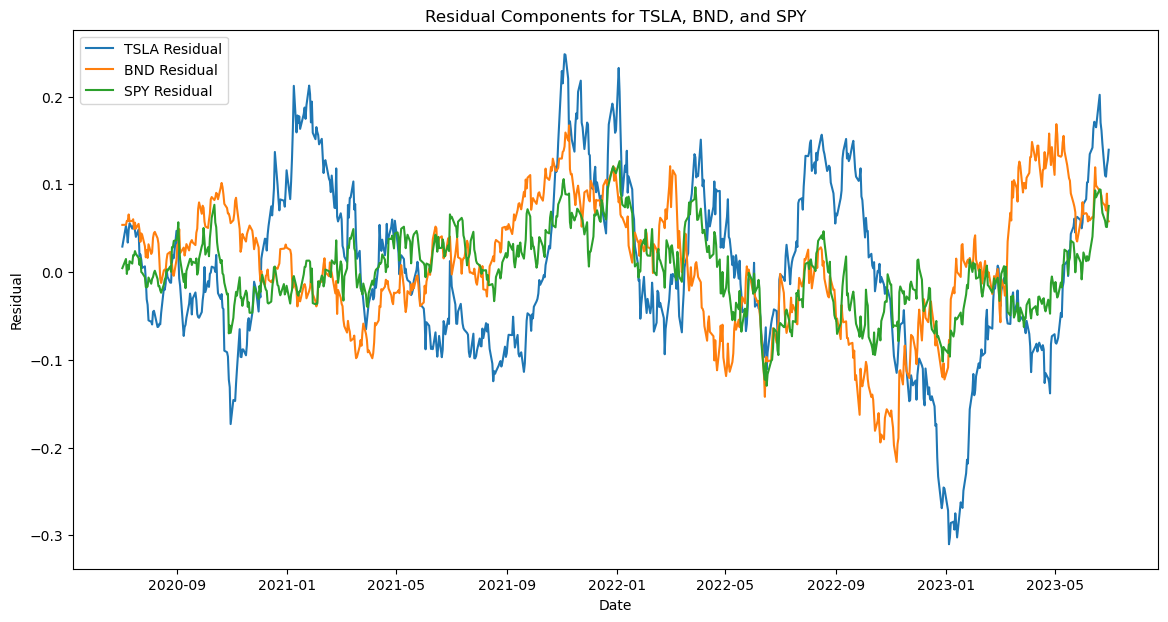

In [19]:
#Decompose Time Series
decompose_time_series_all_in_one(data_frames)

In [ ]:
# Analyze days with unusually high or low returns
analyze_unusual_returns(data_frames, threshold=2)

Unusual Returns for TSLA:
         Date     Close  Daily Return
53 2020-03-19  0.011475           inf 

Unusual Returns for BND:
          Date     Close  Daily Return
707 2022-10-21  0.007578           inf
709 2022-10-25  0.042944     33.022765 

Unusual Returns for SPY:
         Date   Close  Daily Return
56 2020-03-24  0.0717           inf 



In [ ]:
data_frames

{'TSLA':            Date     Close      Open      High       Low    Volume  \
 0    2020-01-02  0.011927  0.008590  0.004446  0.012416  0.128385   
 1    2020-01-03  0.014130  0.011350  0.008454  0.015068  0.268205   
 2    2020-01-06  0.015604  0.011345  0.008034  0.015606  0.138573   
 3    2020-01-07  0.018631  0.014955  0.011487  0.017935  0.269962   
 4    2020-01-08  0.022618  0.017077  0.016108  0.020528  0.494826   
 ...         ...       ...       ...       ...       ...       ...   
 1001 2023-12-22  0.592033  0.599705  0.596712  0.596398  0.072171   
 1002 2023-12-26  0.602580  0.593832  0.596066  0.600427  0.064985   
 1003 2023-12-27  0.615096  0.603819  0.609924  0.612485  0.087142   
 1004 2023-12-28  0.593691  0.617558  0.614544  0.599903  0.095196   
 1005 2023-12-29  0.581511  0.595410  0.588892  0.586092  0.080496   
 
       Daily Return  Rolling Mean  Rolling Std   Z-Score  
 0              NaN           NaN          NaN -2.104161  
 1         0.184676           Na

In [ ]:
#save each datasetf or later use
save_ticker_data(data_frames, '../data')


Data for TSLA saved to ../data/TSLA_data.csv
Data for BND saved to ../data/BND_data.csv
Data for SPY saved to ../data/SPY_data.csv
